In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.mlab as mlab
%matplotlib inline

###Q1 Import the dataset and try to understand what information each column is giving. What is our target variable? Is this a classification or regression problem?

In [2]:
#Import dataset
df=pd.read_csv("Ad Click Data.csv")
df

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0.0,Tunisia,3/27/2016 0:53,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1.0,Nauru,4/4/2016 1:39,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0.0,San Marino,3/13/2016 20:35,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1.0,Italy,1/10/2016 2:31,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0.0,Iceland,6/3/2016 3:36,0
...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1.0,Lebanon,2/11/2016 21:49,1
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1.0,Bosnia and Herzegovina,4/22/2016 2:07,1
997,NaN,51,42415.72,120.37,Expanded intangible solution,South Jessica,1.0,Mongolia,2/1/2016 17:24,1
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0.0,Guatemala,3/24/2016 2:35,0


<AxesSubplot:>

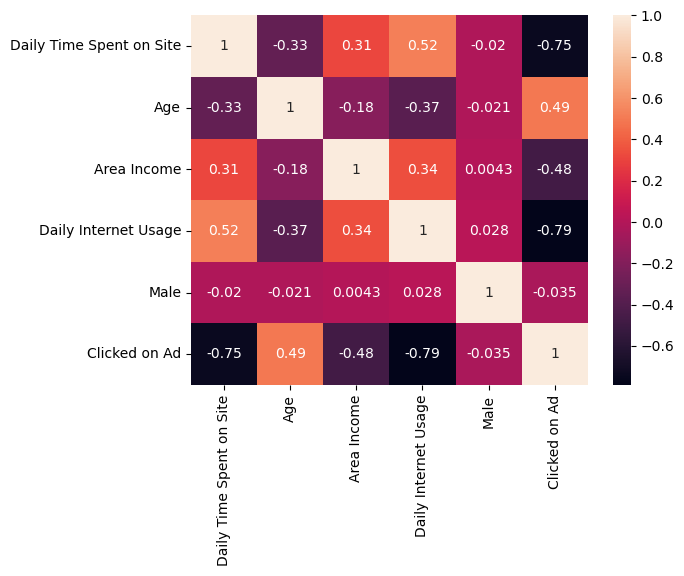

In [3]:
corr=df.corr()
#plt.figure(figsize=(6,6))
sns.heatmap(corr, annot=True)

In [4]:
df.drop(['Ad Topic Line','City','Country','Timestamp'], axis=1,inplace=True)

In [6]:
#Deal with null values
print(df.isnull().sum())
df['Area Income'].fillna(value=df['Area Income'].mean(), inplace=True)
df['Daily Internet Usage'].fillna(value=df['Daily Internet Usage'].mean(), inplace=True)
df['Daily Time Spent on Site'].fillna(value=df['Daily Time Spent on Site'].mean(), inplace=True)
df['Male'].fillna(0.0,inplace=True)
print('*'*30)
print(df.isnull().sum())

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Male                        3
Clicked on Ad               0
dtype: int64
******************************
Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Male                        0
Clicked on Ad               0
dtype: int64


In [7]:
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,64.929524,36.009000,54980.667234,179.863620,0.479000,0.50000
std,15.741268,8.785562,13352.264717,43.627946,0.499809,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.545000,29.000000,47117.162500,139.017500,0.000000,0.00000
50%,67.780000,35.000000,56786.965000,181.065000,0.000000,0.50000
75%,78.352500,42.000000,65241.887500,218.287500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,267.010000,1.000000,1.00000


<AxesSubplot:xlabel='Clicked on Ad', ylabel='count'>

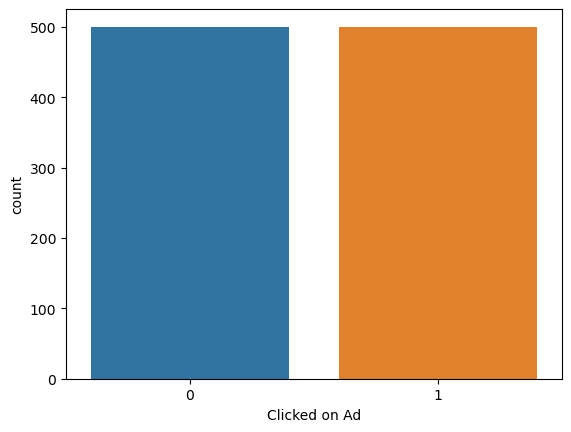

In [8]:
sns.countplot(x = 'Clicked on Ad', data = df)

<AxesSubplot:xlabel='Daily Time Spent on Site', ylabel='Count'>

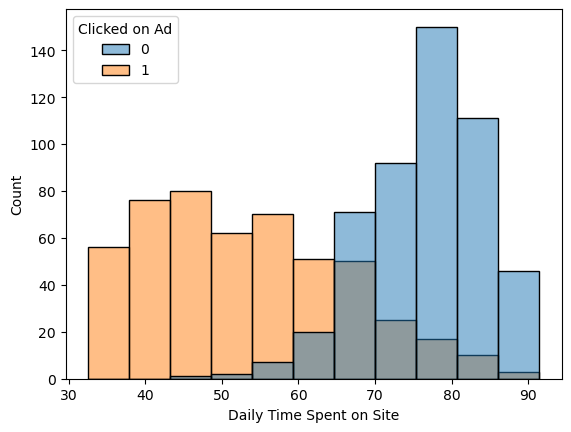

In [9]:
sns.histplot(data=df,x='Daily Time Spent on Site',hue='Clicked on Ad')

<AxesSubplot:xlabel='Age', ylabel='Count'>

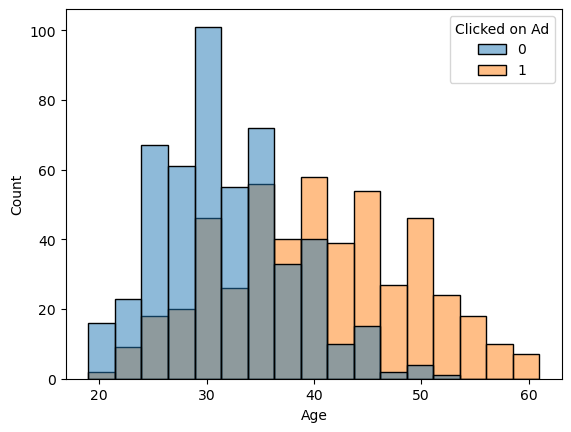

In [10]:
sns.histplot(data=df,x='Age',hue='Clicked on Ad')

(1000, 6)

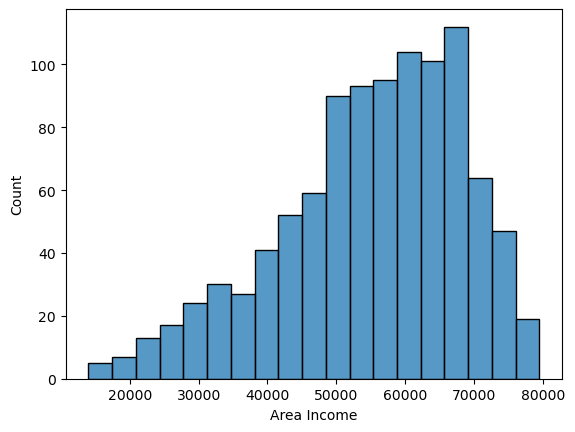

In [11]:
sns.histplot(data=df,x='Area Income')
df.shape

### Split dataset into independent and dependent features

### Train Test Split

In [14]:
from sklearn.model_selection import train_test_split
x = df[['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage', 'Male']]
y = df['Clicked on Ad']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
print(X_test.shape)

(300, 5)


In [15]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(x_train, y_train)

LogisticRegression()

In [19]:
y_pred = classifier.predict(x_test)

In [20]:
confusion_matrix(y_test, y_pred)

array([[139,   7],
       [ 28, 126]], dtype=int64)

In [21]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
accuracy = accuracy_score(y_test, y_pred)
print(precision)
print(recall)
print(accuracy)

0.9473684210526315
0.8181818181818182
0.8833333333333333
